In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import synchrony.PlottingTools as plottingTools
from synchrony.ParameterSet import ParameterSet
import synchrony.DataStorage as dataStorage
import synchrony.DataAnalysis as dataAnalysis
import synchrony.MakeDataframe as makeDataframe
from synchrony import mainClass

In [2]:
file_path_input_params_json = '../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'Paper/Fig_01/Time_traces'
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Data/Synchrony/Paper/Fig_01/Time_traces
parameter_path /home/berger/Data/Synchrony/Paper/Fig_01/Time_traces/parameter_set.csv


In [3]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)
orange = (235 / 255, 157 / 255, 18 / 255)

# Make data frame from time traces

In [4]:
data_frame = makeDataframe.make_dataframe(file_path)
time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_init_events')
v_init = v_init_data_frame.iloc[0]['v_init']
t_init_list = v_init_data_frame['t_init'].to_numpy()
# print(v_init)

v_d_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_div_events')
print(v_d_data_frame['v_b'])
data_frame

['/home/berger/Data/Synchrony/Paper/Fig_01/Time_traces/Example_time_trace_new']
0     1.427133
1     1.482482
2     1.361615
3     1.446847
4     1.390365
5     1.397900
6     1.463026
7     1.455287
8     1.413091
9     1.393974
10    1.413675
11    1.393535
12    1.324595
13    1.328316
14    1.389334
15    1.467121
16    1.312388
Name: v_b, dtype: float64


,simu_name,simu_path,sub_simu_name,sub_simu_path,path_parameter_file,path_dataset,n_series,id,git_version,doubling_rate,...,block_production_onset,block_production_offset,f_crit,high_rate_dars2,dars2_rate_indep_density,cv_division_position,independent_division_cycle,version_of_independent_division_regulation,version_of_coupled_division_regulation,division_volume
0,Example_time_trace_new,/home/berger/Data/Synchrony/Paper/Fig_01/Time_...,vary_growth_rate_0,/home/berger/Data/Synchrony/Paper/Fig_01/Time_...,/home/berger/Data/Synchrony/Paper/Fig_01/Time_...,/home/berger/Data/Synchrony/Paper/Fig_01/Time_...,1,0,4df118328b1c1f2480f9fa5849276c749a16c5e9,1.5,...,0.11,0.17,0.5,600.0,0.0,0.0,0.0,IDA,cooper,2.828427


In [5]:
time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori = np.array(time_traces_data_frame["n_ori"])
active_fraction = np.array(time_traces_data_frame["activation_potential"])
opening_prob = np.array(time_traces_data_frame["origin_opening_probability"])
# print(time.size)
t_0 = time[volume==v_d_data_frame['v_b'][1]]
indx_0 = np.where(time==t_0)[0][0]
t_f = time[volume==v_d_data_frame['v_b'][4]]
indx_f = np.where(time==t_f)[0][0]+20

# print(indx_0, indx_f)

n_ori_cut = n_ori[indx_0:indx_f]
time_cut = time[indx_0:indx_f]
volume_cut = volume[indx_0:indx_f]
active_fraction_cut = active_fraction[indx_0:indx_f]
opening_prob_cut = opening_prob[indx_0:indx_f]

t_init_list_cut_1 = t_init_list[t_init_list>t_0]
t_init_list_cut = t_init_list_cut_1[t_init_list_cut_1<t_f]

t_b_list = np.array(v_d_data_frame['t_d'])

t_b_cut_1 = t_b_list[t_b_list>t_0]
# t_b = t_init_list_cut + data_frame.iloc[0]['t_CD']
t_b_cut = t_b_cut_1[t_b_cut_1<=t_f]
print(t_b_cut, t_f)
print(t_init_list_cut)

[2.9637 3.6888 4.3172] [4.3172]
[2.6886 2.7189 3.317  3.3351 3.9889 4.076 ]


# Plot time traces

0.6666666666666666


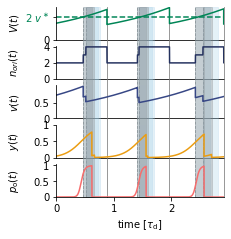

In [6]:
label_list = [r'$V(t)$', r'$n_{ori}(t)$',r'$v(t)$',  r'$y(t)$', r'$p_{\rm o}(t)$']
legend_bool_list = [0, 0, 0, 0, 0]
# legend_list = [' ', ' ', r'$\langle f \, \rangle = {}$'.format(np.round(dataAnalysis.calculate_average_active_fraction(data_frame, 3, 0), 2))]
x_axes_list = [time_cut, time_cut, time_cut, time_cut, time_cut]
y_axes_list = [volume_cut, n_ori_cut, volume_cut/n_ori_cut, active_fraction_cut, opening_prob_cut]
color_list = [green, dark_blue, blue, orange, pinkish_red]

fig, ax = plt.subplots(5, figsize=(3,3.5))
plt.xlabel(r'time [$\tau_{\rm d}$]')
y_min_list = [0,0,0,0,0]
y_max_list = [1, 1.2, 1.2, 1.2, 1.2]

doubling_time = 1/data_frame.iloc[0]['doubling_rate']
print(doubling_time)
for item in range(0, len(label_list)):
    ax[item].set_ylabel(label_list[item])
    ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item])
    ax[item].set_ylim(ymin=0)
    ax[item].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax[item].spines["top"].set_visible(False)
    ax[item].spines["right"].set_visible(False)
    ax[item].margins(0)
    for t_div in t_b_cut:
        ax[item].axvline(x=t_div, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="grey",
                          zorder=0, 
                          linewidth=0.8,
                          clip_on=False)
    for t_init in t_init_list_cut:
        ax[item].axvline(x=t_init, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="grey",
                          zorder=0, 
                          linewidth=0.8,
                          linestyle='--',
                          clip_on=False)
        ax[item].axvspan(t_init, 
                 t_init + data_frame.iloc[0]['period_blocked'], 
                  ymin=y_min_list[item],
                  ymax=y_max_list[item],
                 alpha=0.3, 
                 color=light_blue, 
                 linewidth=0.8,
                 clip_on=False)
        ax[item].axvspan(t_init, 
                 t_init + data_frame.iloc[0]['t_doubling_datA'], 
                  ymin=y_min_list[item],
                  ymax=y_max_list[item],
                 alpha=0.3, 
                 color='grey', 
                 linewidth=0.8,
                 clip_on=False)
        
ax[0].set_yticks([0, 2])
ax[0].set_yticklabels(['0',r'2 $v^\ast$'])
ax[0].get_yticklabels()[1].set_color(green)
ax[0].axhline(y=2, color=green, linestyle='--')
# labelx = -0.1  # axes coords
# for j in range(3):
#     ax[j].yaxis.set_label_coords(labelx, 0.5)

if data_frame.iloc[0]["doubling_rate"] <= 0.5:
    ax[1].set_yticks([0,1,2])
    ax[1].set_yticklabels([r'0',r'1', r'2'])
    
elif data_frame.iloc[0]["doubling_rate"] <= 1.8:
    ax[1].set_yticks([0,2,4])
    ax[1].set_yticklabels([r'0',r'2', r'4'])
else:
    ax[1].set_yticks([0,4,8])
    ax[1].set_yticklabels([r'0',r'4', r'8'])

ax[2].set_yticks([0, 0.5])
ax[2].set_yticklabels(['0', r'0.5'])
# ax[2].set_yticks([0, data_frame.iloc[0]['frac_init']])
# ax[2].set_yticklabels(['0', r'$f^\ast$'])
# ax[2].get_yticklabels()[1].set_color(pinkish_red)
ax[3].set_yticks([0, 0.5,1])
ax[3].set_yticklabels(['0', r'0.5', r'1'])
# ax[2].get_yticklabels()[1].set_color(pinkish_red)
ax[4].set_yticks([0, 0.5,1])
ax[4].set_yticklabels(['0', r'0.5', r'1'])
ax[4].tick_params(bottom=True, labelbottom=True)
ax[4].tick_params(axis='x', colors='black')
ax[4].set_xticks([time_cut[0], 
                  time_cut[0]+ doubling_time, 
                  time_cut[0]+ 2 * doubling_time
                 ])
ax[4].set_xticklabels(['0', '1', '2'])
fig.align_ylabels()
plt.savefig(file_path + '/Example_time_trace.pdf', format='pdf', bbox_inches='tight')